<a href="https://colab.research.google.com/github/anisaafn/2025_Visi-Komputer_TI-2B/blob/master/Jobsheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

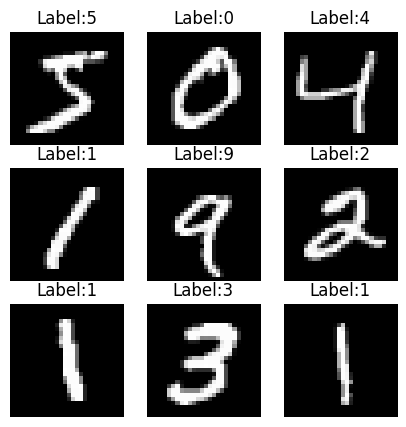

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#tampilkan contoh
plt.figure (figsize=(5, 5))
for i in range (9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.title(f"Label:{y_train[i]}")
  plt.axis('off')

plt.show()

Tugas kecil: Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak contoh. Apa yang Anda perhatikan dari bentuk tulisan tangan manusia?

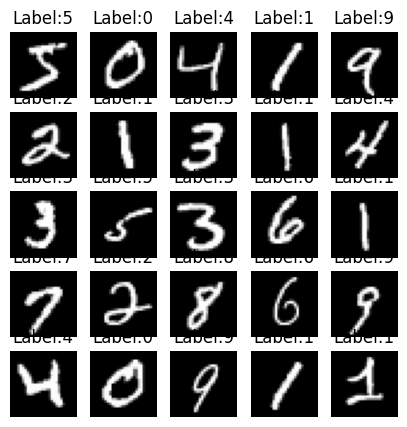

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#tampilkan contoh
plt.figure (figsize=(5, 5))
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.title(f"Label:{y_train[i]}")
  plt.axis('off')

plt.show()

**Praktikum D2 Klasifikasi Gambar dengan Model Machine Learning Tradisional**

Sebelum CNN populer, pendekatan klasik digunakan. Mari kita coba Support Vector Machine (SVM). Dataset yang kita pakai tetap MNIST, tapi gambar harus diubah menjadi vektor 1D.
Langkah di Google Colab:
1.	Flatten setiap gambar 28x28 menjadi vektor 784.
2.	Gunakan sklearn.svm.SVC untuk melatih model sederhana.
3.	Uji model pada data test dan lihat akurasinya.


In [7]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

#prediksi
y_pred = clf.predict(x_test_flat)

#Akurasi
print("Akurasi:", accuracy_score (y_test, y_pred))

Akurasi: 0.9101


Tugas kecil: Ubah kernel dari linear menjadi rbf. Bagaimana pengaruhnya terhadap
akurasi?

In [9]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

#prediksi
y_pred = clf.predict(x_test_flat)

#Akurasi
print("Akurasi:", accuracy_score (y_test, y_pred))

Akurasi: 0.9513


**Praktikum D3 – Membangun CNN Sederhana**

Sekarang saatnya mencoba Convolutional Neural Network. CNN akan belajar mengenali pola dari gambar MNIST secara otomatis.
Langkah di Google Colab:
1.	Ubah data menjadi bentuk [samples, height, width, channels].
2.	Bangun CNN sederhana dengan Conv2D, MaxPooling2D, Flatten, dan Dense.
3.	Latih model dan amati hasilnya.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.8964 - loss: 0.3553 - val_accuracy: 0.9815 - val_loss: 0.0675
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.9814 - loss: 0.0616 - val_accuracy: 0.9870 - val_loss: 0.0516
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9877 - loss: 0.0390 - val_accuracy: 0.9848 - val_loss: 0.0532
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9922 - loss: 0.0248 - val_accuracy: 0.9890 - val_loss: 0.0438
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9938 - loss: 0.0206 - val_accuracy: 0.9857 - val_loss: 0.0561


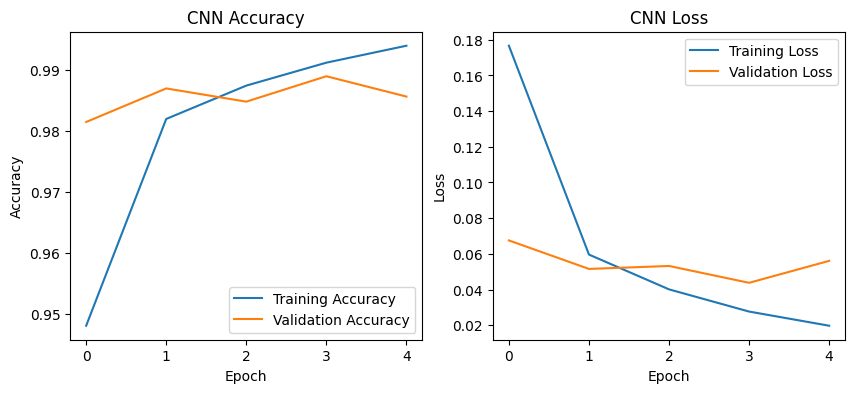

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot History =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tugas kecil: Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya meningkat?

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.8887 - loss: 0.3584 - val_accuracy: 0.9845 - val_loss: 0.0547
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9844 - loss: 0.0536 - val_accuracy: 0.9878 - val_loss: 0.0398
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9894 - loss: 0.0335 - val_accuracy: 0.9872 - val_loss: 0.0441
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9914 - loss: 0.0265 - val_accuracy: 0.9905 - val_loss: 0.0347
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9941 - loss: 0.0180 - val_accuracy: 0.9918 - val_loss: 0.0377


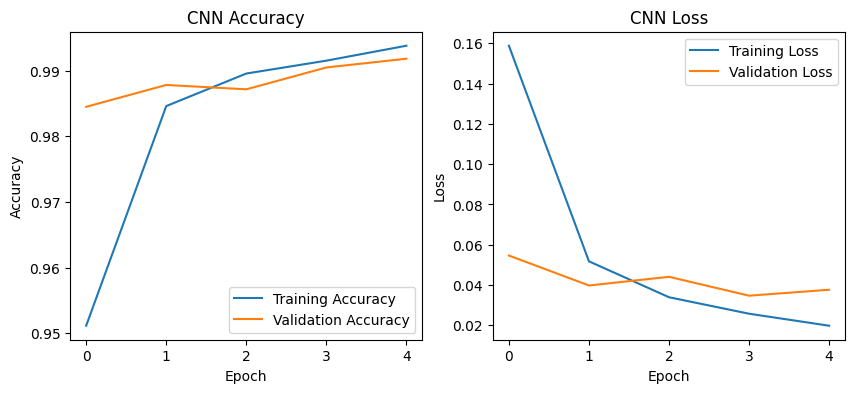

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot History =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()